In [4]:
import pandas as pd 
departments=pd.read_csv(r"C:\Users\VICTUS\Desktop\DATA\departments.csv")
orders=pd.read_csv(r"C:\Users\VICTUS\Desktop\DATA\orders.csv") 
order_products=pd.read_csv(r"C:\Users\VICTUS\Desktop\DATA\order_products__prior.csv") 
product=pd.read_csv(r"C:\Users\VICTUS\Desktop\DATA\products.csv") 
aisle=pd.read_csv(r"C:\Users\VICTUS\Desktop\DATA\aisles.csv")



In [5]:
print("DATA LOADED SUCCESSFULLY")

DATA LOADED SUCCESSFULLY


In [6]:
order_products = pd.read_csv( r"C:\Users\VICTUS\Desktop\DATA\order_products__prior.csv",
        
 dtype={ "order_id": "int32", 
         "product_id": "int32", 
        "add_to_cart_order": "int16", 
         "reordered": "int8" } ) 
product["product_name"] = product["product_name"].astype("category") 
aisle["aisle"] = aisle["aisle"].astype("category") 
departments["department"] = departments["department"].astype("category") 
#I made join for the data 
df=order_products.merge(orders,on='order_id',how='left') 
df=df.merge(product,on='product_id',how='left')
df=order_products.merge(orders,on='order_id',how='left') 
df=df.merge(product,on='product_id',how='left') 
df=df.merge(aisle,on='aisle_id',how='left') 
df=df.merge(departments,on='department_id',how='left') 
## JOINING COMPLETED SUCCESSFULLY #print("the final dataFrame shape is :", df.shape) i


In [7]:
##check the data:
print("print the first five of rows :\n ",df.head())
print("df.info():\n ",df.info())
print("columns of the dataframe :\n ",df.columns)


print the first five of rows :
     order_id  product_id  add_to_cart_order  reordered  user_id eval_set  \
0         2       33120                  1          1   202279    prior   
1         2       28985                  2          1   202279    prior   
2         2        9327                  3          0   202279    prior   
3         2       45918                  4          1   202279    prior   
4         2       30035                  5          0   202279    prior   

   order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0             3          5                  9                     8.0   
1             3          5                  9                     8.0   
2             3          5                  9                     8.0   
3             3          5                  9                     8.0   
4             3          5                  9                     8.0   

            product_name  aisle_id  department_id               aisle  \
0   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 15 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int32   
 1   product_id              int32   
 2   add_to_cart_order       int16   
 3   reordered               int8    
 4   user_id                 int64   
 5   eval_set                object  
 6   order_number            int64   
 7   order_dow               int64   
 8   order_hour_of_day       int64   
 9   days_since_prior_order  float64 
 10  product_name            category
 11  aisle_id                int64   
 12  department_id           int64   
 13  aisle                   category
 14  department              category
dtypes: category(3), float64(1), int16(1), int32(2), int64(6), int8(1), object(1)
memory usage: 2.5+ GB
df.info():
  None
columns of the dataframe :
  Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'ev

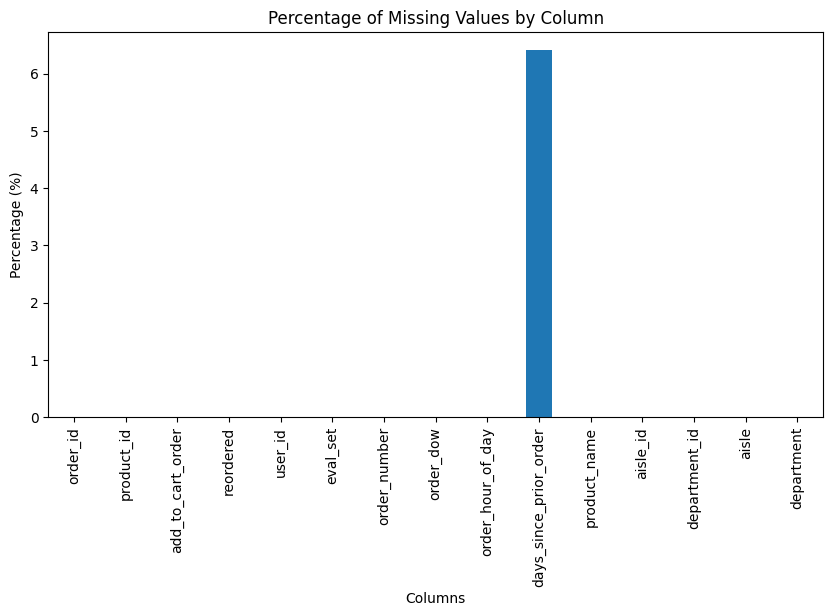

In [8]:
##visulization of missing values:
import matplotlib.pyplot as plt
missing_pct = df.isna().mean() * 100
plt.figure(figsize=(10,5))
missing_pct.plot.bar()
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage (%)')
plt.xlabel('Columns')
plt.show()



In [9]:
## missing values handling:
missing_values=df.isnull().sum()
print("missing values in each column:\n",missing_values)
df["days_since_prior_order"]=df["days_since_prior_order"].fillna(-1).astype("int32")



missing values in each column:
 order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    2078068
product_name                    0
aisle_id                        0
department_id                   0
aisle                           0
department                      0
dtype: int64


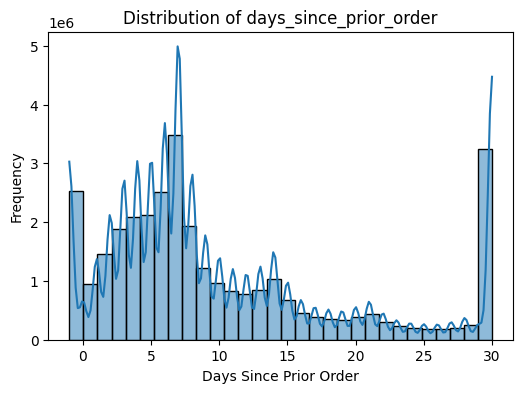

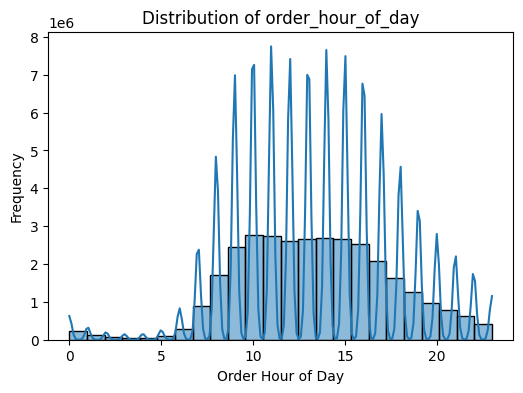

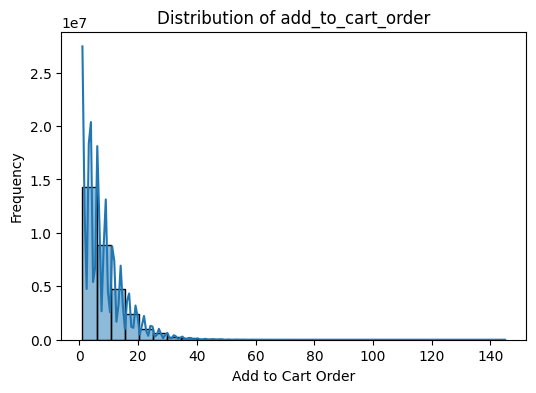

In [10]:
##Distribution plots for numeric feature and targets (histogram ,dinsity plots): 
##days_since_prior_order distribution plot:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(df["days_since_prior_order"], kde=True, bins=30)
plt.title("Distribution of days_since_prior_order")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Frequency")
plt.show()
##order_hour_of_day distribution plot:
plt.figure(figsize=(6,4))
sns.histplot(df["order_hour_of_day"], kde=True, bins=24)
plt.title("Distribution of order_hour_of_day")
plt.xlabel("Order Hour of Day")
plt.ylabel("Frequency")
plt.show()
##add to cart order distribution plot:
plt.figure(figsize=(6,4))
sns.histplot(df["add_to_cart_order"], kde=True, bins=30)
plt.title("Distribution of add_to_cart_order")
plt.xlabel("Add to Cart Order")
plt.ylabel("Frequency")
plt.show()



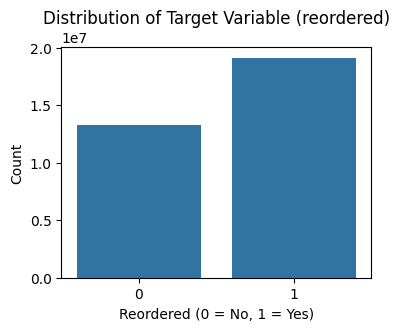

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(4,3))
sns.countplot(x="reordered", data=df)
plt.title("Distribution of Target Variable (reordered)")
plt.xlabel("Reordered (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

In [12]:
##Categorical cardinality analysis (barplots / top-k frequencies
### top k products_names :
top_k_products = ( df["product_name"].value_counts().head(10))
top_k_products

product_name
Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: count, dtype: int64

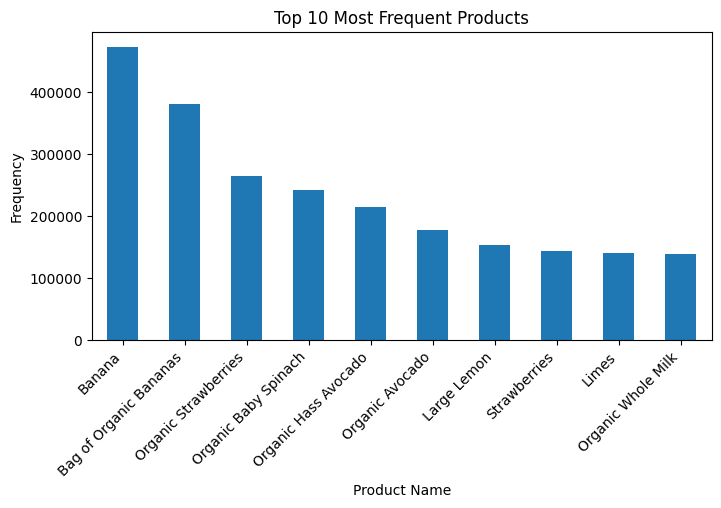

In [13]:
##Categorical cardinality analysis (barplots / top-k frequencies)

top_k_products = df["product_name"].value_counts().head(10)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
top_k_products.plot(kind="bar")
plt.title("Top 10 Most Frequent Products")
plt.xlabel("Product Name")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

In [14]:
top_k_aisles = ( df["aisle"].value_counts().head(10))
top_k_aisles

aisle
fresh fruits                     3642188
fresh vegetables                 3418021
packaged vegetables fruits       1765313
yogurt                           1452343
packaged cheese                   979763
milk                              891015
water seltzer sparkling water     841533
chips pretzels                    722470
soy lactosefree                   638253
bread                             584834
Name: count, dtype: int64

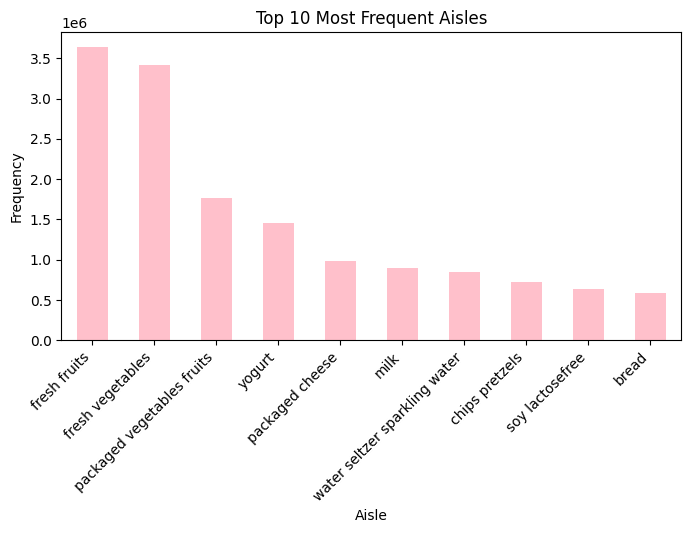

In [15]:
## top k aisles :
plt.figure(figsize=(8,4))
top_k_aisles.plot(kind="bar", color="pink")
plt.title("Top 10 Most Frequent Aisles")
plt.xlabel("Aisle")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.show()

In [16]:
df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department'],
      dtype='object')

In [17]:
##correlation analysis using for numeric variables:
numeric_cols = [
    'order_number',
    'order_hour_of_day',
    'days_since_prior_order',
    'add_to_cart_order',
    'reordered'
    
]
corr_matrix = df[numeric_cols].corr()
corr_matrix

,order_number,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered
order_number,1.000000,-0.040049,-0.249080,-0.004228,0.306840
order_hour_of_day,-0.040049,1.000000,-0.000530,-0.014805,-0.023300
days_since_prior_order,-0.249080,-0.000530,1.000000,0.049870,-0.015715
add_to_cart_order,-0.004228,-0.014805,0.049870,1.000000,-0.133024
reordered,0.306840,-0.023300,-0.015715,-0.133024,1.000000


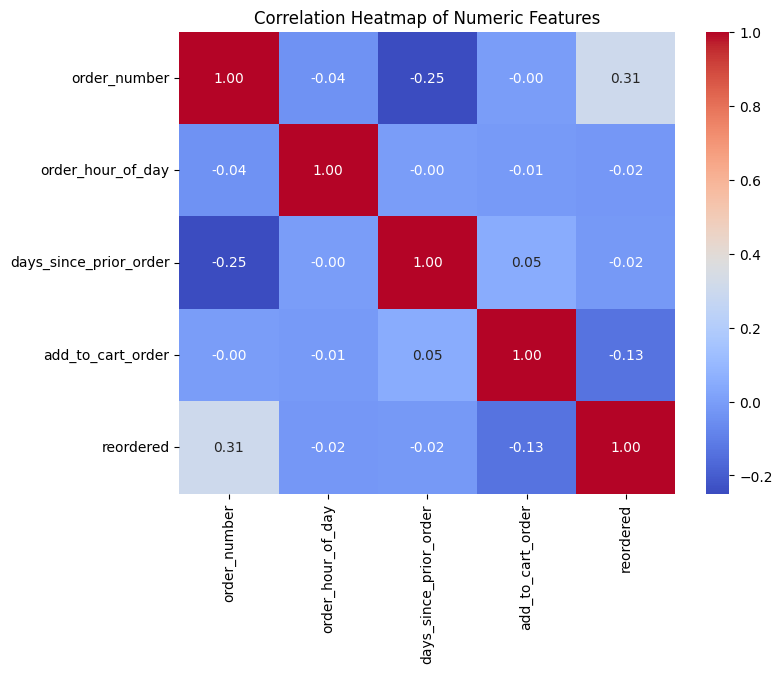

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

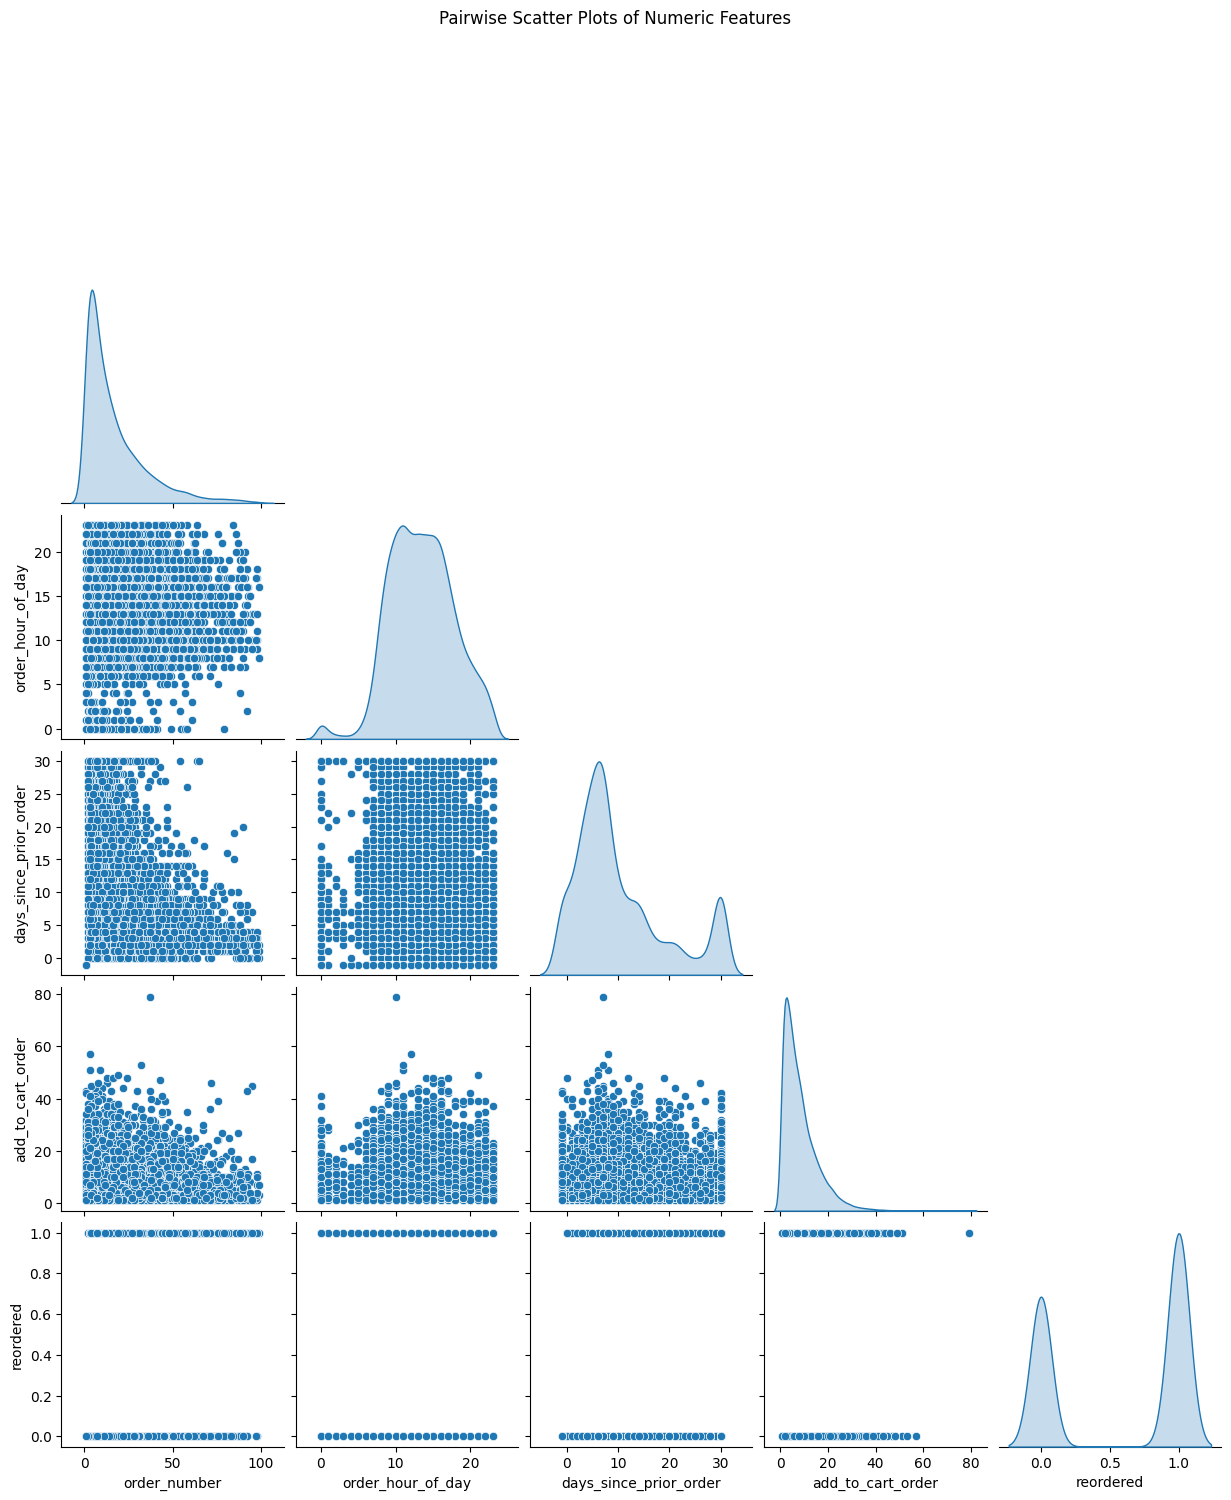

In [19]:

##pairwise relationships:
sample_df = df[numeric_cols].sample(10000, random_state=42)

sns.pairplot(
    sample_df,
    diag_kind="kde",
    corner=True
)
plt.suptitle("Pairwise Scatter Plots of Numeric Features", y=1.2)
plt.show()

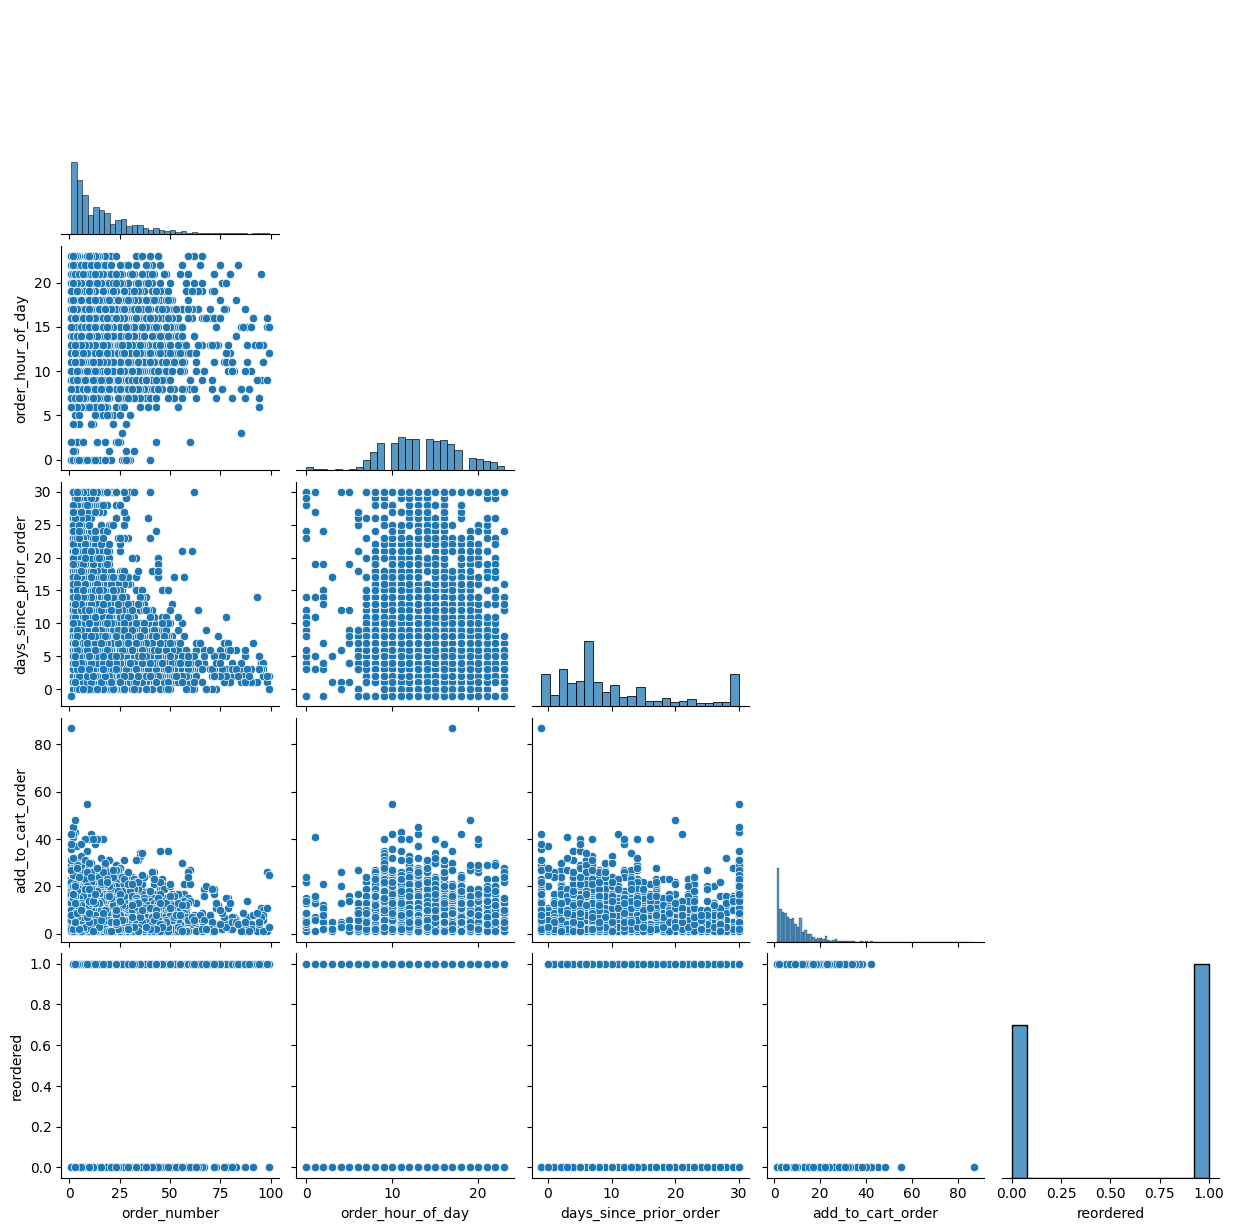

In [20]:
##pairwise relationships:
sns.pairplot(df[numeric_cols].sample(3000), corner=True)
plt.show()

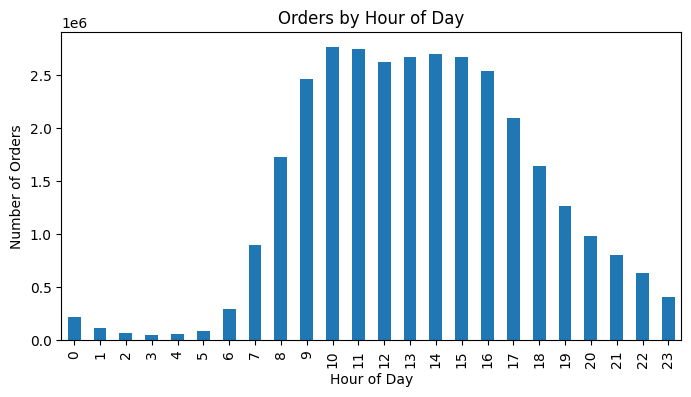

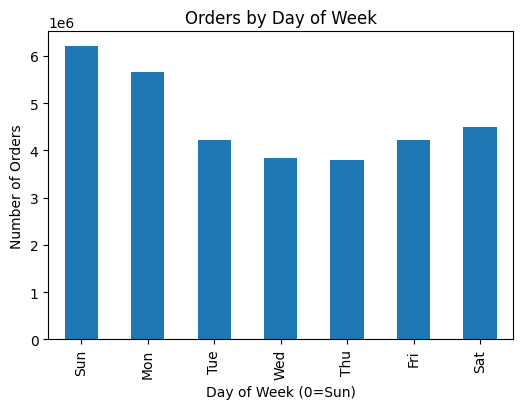

In [21]:

##Time-of-day, day-of-week, and monthly seasonality plots.
orders_by_hour = df['order_hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(8,4))
##orders by hours:
orders_by_hour.plot(kind='bar')
plt.title("Orders by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.show()

## orders by day:
orders_by_day = df['order_dow'].value_counts().sort_index()
day_labels = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
orders_by_day.index = day_labels
plt.figure(figsize=(6,4))
orders_by_day.plot(kind='bar')
plt.title("Orders by Day of Week")
plt.xlabel("Day of Week (0=Sun)")
plt.ylabel("Number of Orders")
plt.show()


In [22]:
##imputation techniques for missing:
df.isnull().sum()
median_value = df['days_since_prior_order'].median()
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(median_value)
mode_value = df['order_dow'].mode()[0]
df['order_dow'] = df['order_dow'].fillna(mode_value)
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0)
df.isnull().sum()
## خطوة التحقق

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
dtype: int64

In [23]:
## model_based:
from sklearn.impute import KNNImputer

imputer = KNNImputer(
    n_neighbors=5,
    weights="distance"
)

df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

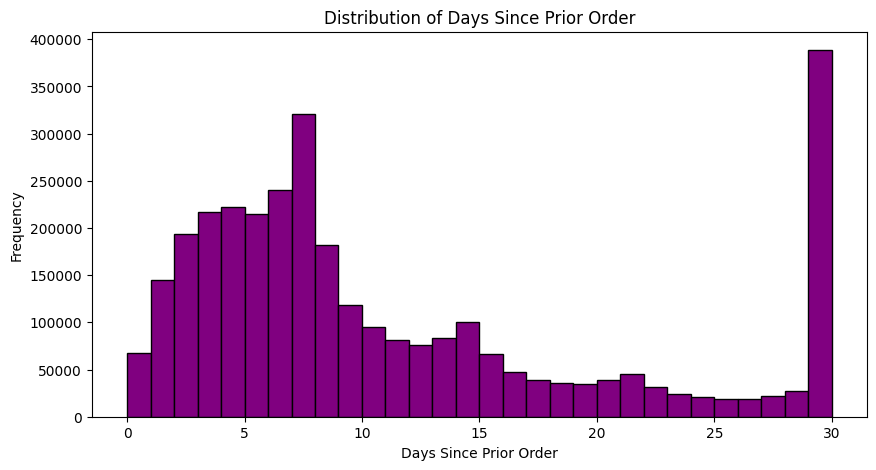

In [24]:
##outlirer analysis for days_since_prior_order
import matplotlib.pyplot as plt 


orders['days_since_prior_order'].describe()
plt.figure(figsize=(10,5))
plt.hist(orders['days_since_prior_order'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of Days Since Prior Order')
plt.xlabel('Days Since Prior Order') 
plt.ylabel('Frequency')
plt.show()

In [25]:
#outliers treatment by Winsorization:
df['add_to_cart_order'] = df['add_to_cart_order'].clip(lower=lower_bound, upper=upper_bound)
df['add_to_cart_order'].describe()


NameError: name 'lower_bound' is not defined

In [0]:
#Encoding categorical variables:
##cat_col=df.select_dtypes(include=["object","category"]).columns
##print(cat_col)
##df_enc = pd.get_dummies(
  ##  df,columns=["eval_set", "aisle", "department"],
    ##drop_first=True


##df_enc.shape()
#لو كملت get dummies رح يعمل memory error لانه : 32 صف وال one_Hot fdulg بيعمل نسخ ضخمة بالذاكرة 


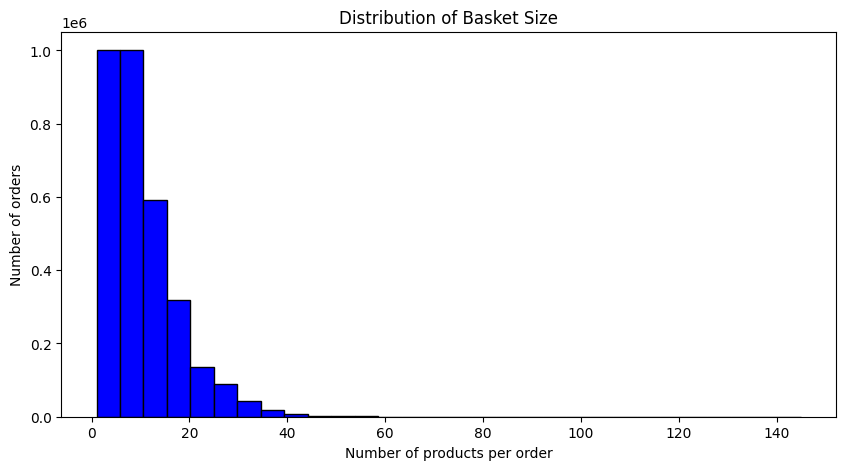

In [ ]:
## Behavioral EDA :
basket_size=df.groupby("order_id")["product_id"].count()
basket_size.describe()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(basket_size,bins=30,color='blue',edgecolor='black')
plt.xlabel("Number of products per order")
plt.ylabel("Number of orders")
plt.title("Distribution of Basket Size")
plt.show()

In [ ]:
orders['days_since_prior_order'].describe()

count    3.214874e+06
mean     1.111484e+01
std      9.206737e+00
min      0.000000e+00
25%      4.000000e+00
50%      7.000000e+00
75%      1.500000e+01
max      3.000000e+01
Name: days_since_prior_order, dtype: float64

In [ ]:
df.memory_usage(deep=True).sum() / 1024**2
categorical_cols = [
    'order_dow',
    'order_hour_of_day',
    'department',
    'aisle',
    'product_name'
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')
df['reordered'] = df['reordered'].astype('int8')
df['add_to_cart_order'] = df['add_to_cart_order'].astype('int16')
df['order_number'] = df['order_number'].astype('int16')
df['days_since_prior_order'] = df['days_since_prior_order'].fillna(0).astype('int16')
df.memory_usage(deep=True).sum() / 1024**2

np.float64(3407.7241497039795)

In [ ]:
# Feature engineering:
#1️⃣1️User-level Features:
#(1) total #orders:
user_total_orders = orders.groupby('user_id')['order_id'].nunique().reset_index()
user_total_orders.rename(columns={'order_id': 'total_orders'}, inplace=True)
#(2) average basket size:
basket_size = df.groupby('order_id')['product_id'].count().reset_index()
basket_size.rename(columns={'product_id':'basket_size'}, inplace=True)

basket_size = basket_size.merge(
    orders[['order_id','user_id']],
    on='order_id'
)

avg_basket = basket_size.groupby('user_id')['basket_size'].mean().reset_index()
#(3) reorder ratio:
reorder_ratio = df.groupby('user_id')['reordered'].mean().reset_index()
#(4) mean days between orders:
mean_days_between_orders = orders.groupby('user_id')['days_since_prior_order'].mean().reset_index()
#(5) last order recency:
last_order_recency = orders.groupby('user_id')['days_since_prior_order'].last().reset_index()
last_order_recency.fillna(0, inplace=True)

#2️⃣ Product-level Features:
product_reorder = df.groupby('product_id')['reordered'].mean().reset_index()
#(2) average position in cart:
avg_cart_pos = df.groupby('product_id')['add_to_cart_order'].mean().reset_index()
product_popularity = df.groupby('product_id')['order_id'].count().reset_index(name='product_popularity')

#3️⃣ User × Product Interaction Features:
#(1) prior purchase count:
prior_count = df.groupby(['user_id','product_id']).size().reset_index(name='prior_count')
#2️⃣ days since last purchase by that user:
df_sorted = df.sort_values(['user_id','product_id','order_number'])
##last_purchase = df_sorted.groupby(['user_id','product_id'])['order_number'].diff()## هاد بيعطي فرق بين كل طلبين 
last_order = df_sorted.groupby(['user_id','product_id'])['order_number'].max().reset_index()
last_order.rename(columns={'order_number':'last_order_number'}, inplace=True)
##average reorder probability for user-product.
user_product_reorder_prob = df.groupby(
    ['user_id','product_id']
)['reordered'].mean().reset_index(name='user_product_reorder_prob')

#4️⃣ Temporal Features:
df['order_hour'] = df['order_hour_of_day']
df['order_day'] = df['order_dow']
##Seasonal features were approximated due to lack of explicit calendar dates
##Holidays flags :Holiday indicators were not available in the dataset
#5️⃣ Aggregations over windows:

recent_orders = orders[orders['order_number'] >= orders.groupby('user_id')['order_number'].transform('max') - 3]
recent_stats = (df.merge(recent_orders[['order_id']], on='order_id').groupby('user_id')['reordered'].mean().reset_index(name='recent_reorder_rate'))

#6️⃣ Non-linear Feature:
##import numpy as np
##prior_count['prior_count'] = prior_count['prior_count'].astype(np.int16)

#df = df.merge(prior_count, on=['user_id','product_id'], how='left')

# بعدين نحسب log
##import numpy as np
##df['log_prior_count'] = np.log1p(df['prior_count'])
#df['prior_count'] = df['prior_count'].fillna(0)

#df['interaction_feature'] = df['user_reorder_ratio'] * df['product_reorder_rate']








MemoryError: Unable to allocate 247. MiB for an array with shape (32434489,) and data type int64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# اختار الأعمدة العددية فقط
numerical_features = ['total_orders', 'avg_basket_size', 'user_reorder_ratio',
                      'mean_days_between_orders', 'last_order_recency',
                      'product_reorder_rate', 'avg_cart_position',
                      'prior_count', 'log_prior_count', 'interaction_feature',
                      'recent_reorder_rate']

X = df[numerical_features]

# نحسب VIF لكل feature
vif = pd.DataFrame()
vif['feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)
##Features with high multicollinearity were either removed or handled using regularization to improve model stability.

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
##8️⃣ Imbalanced Data Handling





df['reordered'].value_counts(normalize=True)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(class_weight='balanced')
## SMOTE 
##from imblearn.over_sampling import SMOTE

##smote = SMOTE()
##X_res, y_res = smote.fit_resample(X, df['reordered'])


In [ ]:
##Time-aware Splitting
# ترتيب الطلبات لكل مستخدم
orders = orders.sort_values(['user_id', 'order_number'])

# train = كل الطلبات قبل آخر order لكل user
train_orders = orders[orders['eval_set'] == 'prior']

# validation = طلبات train (معروف في eval_set)
val_orders = orders[orders['eval_set'] == 'train']


In [ ]:
#تسممية df_modele البيانات النهائية بعد معالجنها
feature_cols = [
    'order_number',
    'order_dow',
    'order_hour_of_day',
    'days_since_prior_order',

    'total_orders',
    'avg_basket_size',
    'reorder_ratio',
    'mean_days_between_orders',
    'last_order_recency',

    'product_reorder_rate',
    'avg_add_to_cart_order',
    'prior_count',

    'log_total_orders'
]
df_model = df[feature_cols + ['reordered']].copy()
df_model.info()

# تبدأ خطوة الclassification modeling:
from sklearn.model_selection import train_test_split

X = df_model.drop(columns=['reordered'])
y = df_model['reordered']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
# هذه الخطوة تستخدم معى فقط logical regression, KNN, SVM:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
#**************************************************************************
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    class_weight='balanced',
    max_iter=1000
)

log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:,1]
#**************************************************************************
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5,
    metric='euclidean'
)

knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_prob_knn = knn.predict_proba(X_test_scaled)[:,1]
#**************************************************************************

from sklearn.svm import SVC

svm = SVC(
    kernel='linear',
    probability=True,
    class_weight='balanced'
)

svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
y_prob_svm = svm.predict_proba(X_test_scaled)[:,1]

#**************************************************************************


from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

#**************************************************************************

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    class_weight='balanced',
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

#**************************************************************************

from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, average_precision_score,
    confusion_matrix
)

def evaluate_model(y_true, y_pred, y_prob):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1': f1_score(y_true, y_pred),
        'ROC_AUC': roc_auc_score(y_true, y_prob),
        'PR_AUC': average_precision_score(y_true, y_prob)
    }

results = {
    'Logistic': evaluate_model(y_test, y_pred, y_prob),
    'KNN': evaluate_model(y_test, y_pred_knn, y_prob_knn),
    'SVM': evaluate_model(y_test, y_pred_svm, y_prob_svm),
    'DecisionTree': evaluate_model(y_test, y_pred_dt, y_prob_dt),
    'RandomForest': evaluate_model(y_test, y_pred_rf, y_prob_rf),
    'XGBoost': evaluate_model(y_test, y_pred_xgb, y_prob_xgb)
}

# رسم للمقارنة:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
ap = average_precision_score(y_test, y_prob)
plt.figure(figsize=(6,4))
plt.plot(recall, precision, label=f'AP = {ap:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix
import seaborn as sns
#Raw confusion matrix:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Raw)')
plt.show()

#Normalized confusion matrix
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
plt.figure(figsize=(4,3))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Normalized)')
plt.show()

#ROC Curve + AUC (تأكيد نهائي)

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Model Comparison:
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Logistic'],
    'AUC': [auc],
    'AP': [ap]
})

results_df
results_df.set_index('Model')[['AUC','AP']].plot(kind='bar', figsize=(6,4))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()




KeyError: "['total_orders', 'avg_basket_size', 'reorder_ratio', 'mean_days_between_orders', 'last_order_recency', 'product_reorder_rate', 'avg_add_to_cart_order', 'prior_count', 'log_total_orders'] not in index"

In [ ]:
#REGRESSION MODELING: numrical
y = df_model['days_since_prior_order']  # target رقمي
X = df_model[['order_number', 'order_dow', 'order_hour_of_day',
              'total_orders', 'avg_basket_size', 'reorder_ratio',
              'mean_days_between_orders', 'last_order_recency']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.3f}")
#********************************************************************************************************************

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
#***********************************************************************************************************************
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
#***********************************************************************************************************************
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(X_train_scaled, y_train)
y_pred_en = en.predict(X_test_scaled)
#***********************************************************************************************************************
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
#***********************************************************************************************************************
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
#***********************************************************************************************************************
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
#***********************************************************************************************************************
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='rmse',
    random_state=42
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# مثال: Linear Regression
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")


residuals = y_test - y_pred_lr

# Histogram
plt.hist(residuals, bins=30)
plt.title('Residuals Histogram')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

# Scatter plot: Predicted vs Residuals
plt.scatter(y_pred_lr, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


n = X_test.shape[0]  # عدد العينات
p = X_test.shape[1]  # عدد الميزات
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print(f"Adjusted R²: {adj_r2:.3f}")


from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    lr, X_train_scaled, y_train, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 5)
)
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train R²')
plt.plot(train_sizes, val_scores.mean(axis=1), label='Validation R²')
plt.xlabel('Training Set Size')
plt.ylabel('R² Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


results = {
    "Linear": mean_squared_error(y_test, y_pred_lr),
    "Ridge": mean_squared_error(y_test, y_pred_ridge),
    "Lasso": mean_squared_error(y_test, y_pred_lasso),
    "ElasticNet": mean_squared_error(y_test, y_pred_en),
    "KNN": mean_squared_error(y_test, y_pred_knn),
    "DT": mean_squared_error(y_test, y_pred_dt),
    "RF": mean_squared_error(y_test, y_pred_rf),
    "XGB": mean_squared_error(y_test, y_pred_xgb)
}

pd.DataFrame.from_dict(results, orient='index', columns=['MSE'])








NameError: name 'df_model' is not defined

In [0]:
#XGBoost:

X = X_train
y = y_train

from xgboost import XGBRegressor

xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

grid.fit(X, y)

best_xgb = grid.best_estimator_

print("Best Parameters:", grid.best_params_)

y_pred_xgb = best_xgb.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2 = r2_score(y_test, y_pred_xgb)

print("XGBoost RMSE:", rmse)
print("XGBoost R²:", r2)


In [0]:
#EDA VISUALS:
#🔹 (A) Histograms – Numerical Feature:
num_cols = [
    'order_number',
    'order_hour_of_day',
    'days_since_prior_order',
    'total_orders',
    'avg_basket_size',
    'reorder_ratio'
]

for col in num_cols:
    plt.figure(figsize=(5,3))
    plt.hist(df_model[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

#🔹 (B) Boxplots – Outliers:

for col in num_cols:
    plt.figure(figsize=(5,3))
    plt.boxplot(df_model[col], vert=False)
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()


#(C) Bar Charts – Categorical:

cat_cols = ['order_dow', 'aisle', 'department']

for col in cat_cols:
    df_model[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top categories in {col}')
    plt.ylabel('Count')
    plt.show()





In [0]:
#2️⃣ CORRELATION ANALYSIS:

corr = df_model[num_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [26]:
#3️⃣ TARGET DISTRIBUTION:
# قبل التحويل:

plt.hist(y, bins=30)
plt.title('Target Distribution (Original)')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

y_log = np.log1p(y)

plt.hist(y_log, bins=30)
plt.title('Target Distribution (Log Transformed)')
plt.xlabel('Log(Target)')
plt.ylabel('Frequency')
plt.show()


NameError: name 'y' is not defined

In [0]:
plt.figure(figsize=(6,4))
plt.hist(df_model['total_orders'], bins=30)
plt.xlabel('total_orders')
plt.ylabel('Frequency')
plt.title('Distribution of total_orders')
plt.show()

#2️⃣ Density Plot:

df_model['total_orders'].plot(kind='density')
plt.title('Density Plot of total_orders')
plt.show()

#3️⃣ Boxplot – كشف الـ Outliers:

plt.boxplot(df_model['total_orders'])
plt.title('Boxplot of total_orders')
plt.show()

#5️⃣ بعد ما شفنا skew → Log Transform:
df_model['log_total_orders'] = np.log1p(df_model['total_orders'])
np.log1p()
plt.hist(df_model['log_total_orders'], bins=30)
plt.title('Log-transformed total_orders')
plt.show()



In [0]:
num_cols = [
    'order_number',
    'order_dow',
    'order_hour_of_day',
    'days_since_prior_order',
    'total_orders',
    'avg_basket_size',
    'reorder_ratio',
    'mean_days_between_orders'
]
corr_matrix = df_model[num_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

sns.pairplot(
    df_model[['total_orders', 'avg_basket_size', 'reorder_ratio']],
    diag_kind='hist'
)
plt.show()


In [0]:
#Model comparison:
#1️⃣ Scatter Plot: Actual vs Predicted:
import matplotlib.pyplot as plt
import seaborn as sns

# مثال لموديل معين
y_test_values = y_test   # القيم الحقيقية
y_pred_values = y_pred_lr  # القيم المتوقعة من الموديل

plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test_values, y=y_pred_values, alpha=0.6)
plt.plot([y_test_values.min(), y_test_values.max()],
         [y_test_values.min(), y_test_values.max()],
         color='red', linestyle='--')  # خط y=x
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

#2️⃣ Residual Plots:
residuals = y_test_values - y_pred_values
#2a. Scatter Plot: Residuals vs Predicted:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred_values, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # الخط الأفقي عند 0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted - Linear Regression")
plt.show()



In [0]:
#2️⃣ Residual Plots:
residuals = y_test_values - y_pred_values
#2a. Scatter Plot: Residuals vs Predicted:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_pred_values, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')  # الخط الأفقي عند 0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted - Linear Regression")
plt.show()

In [ ]:
#2b. Histogram of Residuals:
plt.figure(figsize=(7,5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()


NameError: name 'plt' is not defined

In [0]:
#2c. Q-Q Plot:
import scipy.stats as stats

plt.figure(figsize=(6,6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [0]:
models = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

for name, preds in models.items():
    residuals = y_test - preds
    
    # Scatter Actual vs Predicted
    plt.figure(figsize=(7,7))
    sns.scatterplot(x=y_test, y=preds, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color='red', linestyle='--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"Actual vs Predicted - {name}")
    plt.show()
    
    # Residuals vs Predicted
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=preds, y=residuals, alpha=0.6)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs Predicted - {name}")
    plt.show()
    
    # Residual Histogram
    plt.figure(figsize=(7,5))
    sns.histplot(residuals, bins=30, kde=True)
    plt.title(f"Residuals Distribution - {name}")
    plt.show()
    
    # Q-Q Plot
    plt.figure(figsize=(6,6))
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title(f"Q-Q Plot - {name}")
    plt.show()


In [ ]:
#Actual vs Predicted scatter plots (regression) for each model:
import matplotlib.pyplot as plt

models_preds = {
    "Linear Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

for model_name, y_pred in models_preds.items():
    plt.figure(figsize=(5,5))
    
    # Scatter plot
    plt.scatter(y_test, y_pred, alpha=0.5)
    
    # Ideal line y = x
    plt.plot(
        [y_test.min(), y_test.max()],
        [y_test.min(), y_test.max()],
        'r--'
    )
    
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted - {model_name}")
    
    plt.show()


In [ ]:
#Residual vs predicted:
import matplotlib.pyplot as plt

residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')

plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


In [ ]:
#Residual Histogram:
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30)

plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residuals Histogram")
plt.show()


NameError: name 'residuals' is not defined

<Figure size 600x400 with 0 Axes>

In [ ]:
#Q–Q Plot (Normality Check):
import scipy.stats as stats

plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()


In [ ]:
models = {
    "Linear Regression": y_pred_lr,
    "XGBoost": y_pred_xgb
}

for name, preds in models.items():
    residuals = y_test - preds

    plt.figure(figsize=(5,4))
    plt.scatter(preds, residuals, alpha=0.5)
    plt.axhline(0, color='r', linestyle='--')
    plt.title(f"Residuals vs Predicted - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.show()


NameError: name 'y_pred_lr' is not defined

In [ ]:
#Confusion Matrix (Raw Counts):
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Raw)")
plt.show()


NameError: name 'y_test' is not defined

In [ ]:
#Normalized Confusion Matrix:
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')

plt.figure(figsize=(4,3))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Greens')

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Normalized)")
plt.show()


In [ ]:
#ROC Curve:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure()

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-model)")
plt.legend()
plt.show()


NameError: name 'models' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
#PR Curve:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure()

for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    ap = average_precision_score(y_test, y_proba)
    
    plt.plot(recall, precision, label=f"{name} (AP={ap:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Multi-model)")
plt.legend()
plt.show()


In [ ]:
user_total_orders = (
    df.groupby('user_id')['order_id']
      .nunique()
      .reset_index(name='total_orders')
)
basket_size = (
    df.groupby(['user_id', 'order_id'])['product_id']
      .count()
      .reset_index(name='basket_size')
)

user_avg_basket = (
    basket_size.groupby('user_id')['basket_size']
               .mean()
               .reset_index(name='avg_basket_size')
)
user_reorder_ratio = (
    df.groupby('user_id')['reordered']
      .mean()
      .reset_index(name='reorder_ratio')
)
mean_days = (
    df.groupby('user_id')['days_since_prior_order']
      .mean()
      .reset_index(name='mean_days_between_orders')
)
last_order = (
    df.sort_values('order_number')
      .groupby('user_id')['days_since_prior_order']
      .last()
      .reset_index(name='last_order_recency')
)

product_reorder = (
    df.groupby('product_id')['reordered']
      .mean()
      .reset_index(name='product_reorder_rate')
)
avg_cart = (
    df.groupby('product_id')['add_to_cart_order']
      .mean()
      .reset_index(name='avg_add_to_cart_order')
)
prior_count = (
    df.groupby('product_id')['order_id']
      .count()
      .reset_index(name='prior_count')
)
df_final = df.copy()
df_final = df_final.merge(user_total_orders, on='user_id', how='left')
df_final = df_final.merge(user_avg_basket, on='user_id', how='left')
df_final = df_final.merge(user_reorder_ratio, on='user_id', how='left')
df_final = df_final.merge(mean_days, on='user_id', how='left')
df_final = df_final.merge(last_order, on='user_id', how='left')
df_final = df_final.merge(product_reorder, on='product_id', how='left')
df_final = df_final.merge(avg_cart, on='product_id', how='left')
df_final = df_final.merge(prior_count, on='product_id', how='left')
df_final.info()



NameError: name 'df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
df_model = df_final[feature_cols + ['reordered']].copy()

X = df_model.drop(columns=['reordered'])
y = df_model['reordered']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)



NameError: name 'df_final' is not defined

In [ ]:
##desicion boundary of plots :
##تجهيز البيانت لل PCA :
from sklearn.decomposition import PCA

# نأخذ بيانات التدريب فقط
X_vis = X_train_scaled
y_vis = y_train

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_vis)
## DRAWIND THE DECISION BOUNDARY:

import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y, s=10)
    plt.title(title)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


NameError: name 'X_train_scaled' is not defined

In [ ]:
##تدريب النماذج على PCA
##Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_vis = LogisticRegression(class_weight='balanced')
lr_vis.fit(X_pca, y_vis)

plot_decision_boundary(lr_vis, X_pca, y_vis,
                       "Decision Boundary - Logistic Regression")
#KNN:
from sklearn.neighbors import KNeighborsClassifier

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_pca, y_vis)

plot_decision_boundary(knn_vis, X_pca, y_vis,
                       "Decision Boundary - KNN")
##SVM:
from sklearn.svm import SVC

svm_vis = SVC(kernel='linear', class_weight='balanced')
svm_vis.fit(X_pca, y_vis)

plot_decision_boundary(svm_vis, X_pca, y_vis,
                       "Decision Boundary - SVM")
##Decision Tree:
from sklearn.tree import DecisionTreeClassifier

dt_vis = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_vis.fit(X_pca, y_vis)

plot_decision_boundary(dt_vis, X_pca, y_vis,
                       "Decision Boundary - Decision Tree")



In [ ]:
##1-Tree-based Feature Importance (Random Forest)
import pandas as pd
import matplotlib.pyplot as plt

# أهمية الميزات من Random Forest
rf_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,5))
rf_importance.plot(kind='bar')
plt.title('Feature Importance - Random Forest')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()
## 2-Linear Model Coefficients (Logistic Regression):
log_coef = pd.Series(
    log_reg.coef_[0],
    index=X_train.columns
).sort_values()

plt.figure(figsize=(8,5))
log_coef.plot(kind='barh')
plt.title('Feature Coefficients - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()
##SHAP – Tree Model (Random Forest أو XGBoosT):
pip install shap
import shap

# استخدام عينة صغيرة (عشان السرعة)
X_sample = X_train.sample(5000, random_state=42)

explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_sample)

shap.summary_plot(
    shap_values_rf[1],
    X_sample,
    plot_type="bar"
)
##SHAP – Linear Model (Logistic Regression)
explainer_lr = shap.LinearExplainer(
    log_reg,
    X_train_scaled,
    feature_names=X_train.columns
)

shap_values_lr = explainer_lr.shap_values(X_train_scaled)

shap.summary_plot(
    shap_values_lr,
    X_train,
    plot_type="bar"
)



SyntaxError: invalid syntax (1131442140.py, line 30)

In [ ]:
##نحدد أهم 3 Features (من Random Forest
import pandas as pd

top_features = (
    pd.Series(rf.feature_importances_, index=X_train.columns)
    .sort_values(ascending=False)
    .head(3)
    .index
)

top_features
##رسم Partial Dependence Plots (Random Forest)
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))

PartialDependenceDisplay.from_estimator(
    rf,                # النموذج
    X_train,            # البيانات (غير scaled للشجر)
    features=top_features,
    grid_resolution=50,
    ax=ax
)

plt.suptitle('Partial Dependence Plots (Top 3 Features)', fontsize=14)
plt.tight_layout()
plt.show()


NameError: name 'rf' is not defined